In [3]:
import pandas as pd
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re 

In [4]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [5]:
# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [6]:
# Function to preprocess text
def preprocess_text(text):
    # 1. Expand Contractions
    text = contractions.fix(text)
    
    # 2. Remove URLs and Emails
    text = re.sub(r'http\S+|www\S+|https\S+|mailto:\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S+@\S+', '', text)
    
    # 3. Remove special characters and emojis
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 4. Tokenization
    words = word_tokenize(text)
    
    # 5. Lowercasing
    words = [word.lower() for word in words]
    
    # 6. Removing Punctuation
    words = [word for word in words if word.isalnum()]
    
    # 7. Removing Stop Words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # 8. Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    # 9. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    return ' '.join(lemmatized_words)

# Apply preprocessing to the dataset
df['preprocessed_text'] = df['reviewText'].apply(preprocess_text)

# Display the first few rows of the preprocessed dataset
print(df[['reviewText', 'preprocessed_text']].head())

# Perform vectorization
# Using CountVectorizer
count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(df['preprocessed_text'])
print("Count Vectorizer - Feature Names:", count_vectorizer.get_feature_names_out())
print("Count Vectorizer - Vectorized Text:", count_vector.toarray())

# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(df['preprocessed_text'])
print("TF-IDF Vectorizer - Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Vectorizer - Vectorized Text:", tfidf_vector.toarray())


                                          reviewText  \
0  This is a one of the best apps acording to a b...   
1  This is a pretty good version of the game for ...   
2  this is a really cool game. there are a bunch ...   
3  This is a silly game and can be frustrating, b...   
4  This is a terrific game on any pad. Hrs of fun...   

                                   preprocessed_text  
0  one best apps acording bunch people agree bomb...  
1  pretty good version game free lot different le...  
2  really cool game bunch level find golden egg s...  
3  silly game frustrating lot fun definitely reco...  
4  terrific game pad hr fun grandkids love great ...  
Count Vectorizer - Feature Names: ['aa' 'aaa' 'aaaa' ... 'zzz' 'zzzz' 'zzzzz']
Count Vectorizer - Vectorized Text: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
TF-IDF Vectorizer - Feature Names: ['aa' 'aaa' 'aaaa' ... 'zzz' 'zzzz' 'zzzzz']
TF-IDF Vectorizer 

In [7]:
df['preprocessed_text']

0        one best apps acording bunch people agree bomb...
1        pretty good version game free lot different le...
2        really cool game bunch level find golden egg s...
3        silly game frustrating lot fun definitely reco...
4        terrific game pad hr fun grandkids love great ...
                               ...                        
19995    app fricken stupidit froze kindle allow place ...
19996    please add need neighbor ginger thanks bunch a...
19997    love game awesome wish free stuff house cost m...
19998    love love love app side fashion story fight wo...
19999    game rip list thing make betterbull first need...
Name: preprocessed_text, Length: 20000, dtype: object

In [8]:
processed_file_path = 'amazon_processed.csv'
df.to_csv(processed_file_path, index=False)

SENTIMENT ANALYSIS - using NLTK Sentiment Analyzer & Classifiers

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
analyzer = SentimentIntensityAnalyzer()

In [12]:
#create get sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

In [13]:
#apply get sentiment
df['NLTK_sentiment'] = df['preprocessed_text'].apply(get_sentiment)
df.head()

,reviewText,Positive,preprocessed_text,NLTK_sentiment
0,This is a one of the best apps acording to a b...,1,one best apps acording bunch people agree bomb...,1
1,This is a pretty good version of the game for ...,1,pretty good version game free lot different le...,1
2,this is a really cool game. there are a bunch ...,1,really cool game bunch level find golden egg s...,1
3,"This is a silly game and can be frustrating, b...",1,silly game frustrating lot fun definitely reco...,1
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad hr fun grandkids love great ...,1


In [14]:
print(confusion_matrix(df['Positive'], df['NLTK_sentiment']))

[[ 1076  3691]
 [  571 14662]]


In [15]:
print(classification_report(df['Positive'], df['NLTK_sentiment']))

              precision    recall  f1-score   support

           0       0.65      0.23      0.34      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.59      0.60     20000
weighted avg       0.76      0.79      0.74     20000




KeyboardInterrupt



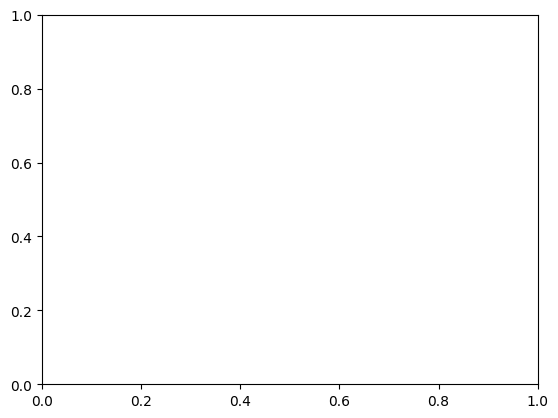

In [16]:
import matplotlib.pyplot as plt
sentiment_count = df['Positive'].value_counts()

plt.plot(sentiment_count, labels = sentiment_count.index, )

Machine learning based approaches
1. Data Collection: obtain a labelled dataset with text and corresponding sentiment lables
2. Data Preprocessing: clean and prepare the data
3. Feature Extraction: convert text data into numerical features
4. Model Training: train a machine learning model on the features
5. Model evaluation: evaluate the model's performance on a test set
6. Prediction: use the trained model to predict sentiment on new data.

In [17]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df['preprocessed_text'],df['Positive'], test_size=0.1, random_state=22)

In [19]:
# Vectorize the text data
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

#Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train_vec,y_train)

#SVM
model_svm = SVC()
model_svm.fit(x_train_vec,y_train)

#random Forest
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train_vec,y_train)

RandomForestClassifier()

In [20]:
#Prediction
#Logistic Regression
y_pred_lr = model_lr.predict(x_test_vec)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

#SVC
y_pred_svm = model_svm.predict(x_test_vec)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

#Random Forest Classifier
y_pred_rf = model_rf.predict(x_test_vec)
print("Random Forest Classifier Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy:  0.8895
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       484
           1       0.92      0.94      0.93      1516

    accuracy                           0.89      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.89      0.89      0.89      2000

SVM Accuracy:  0.895
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       484
           1       0.91      0.96      0.93      1516

    accuracy                           0.90      2000
   macro avg       0.88      0.82      0.85      2000
weighted avg       0.89      0.90      0.89      2000

Random Forest Classifier Accuracy:  0.8735
              precision    recall  f1-score   support

           0       0.86      0.57      0.69       484
           1       0.88      0.97      0.92      1516

    accuracy                           0.87      2000
   macro avg       0.87   

CLUSTERING


1. Data collection
2. Data Preprocessing
3. Feature Extraction
4. Clustering
5. Visualization and Evaluation

In [21]:
vectorizert = TfidfVectorizer(max_features=2000)
x = vectorizert.fit_transform(df['preprocessed_text'])

In [23]:
from sklearn.cluster import KMeans

In [24]:
#define the no. of clusters
num_clusters = 2

#Applyy K-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(x)

#Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

In [25]:
df.head(10)

,reviewText,Positive,preprocessed_text,NLTK_sentiment,cluster
0,This is a one of the best apps acording to a b...,1,one best apps acording bunch people agree bomb...,1,0
1,This is a pretty good version of the game for ...,1,pretty good version game free lot different le...,1,1
2,this is a really cool game. there are a bunch ...,1,really cool game bunch level find golden egg s...,1,1
3,"This is a silly game and can be frustrating, b...",1,silly game frustrating lot fun definitely reco...,1,1
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad hr fun grandkids love great ...,1,1
5,This is a very entertaining game! You don't h...,1,entertaining game smart play guess like itit e...,1,1
6,this is awesome and you don't need wi ti to pl...,1,awesome need wi ti play trust really fun addic...,1,1
7,this is awesome I bet no one even reads the re...,1,awesome bet one even read review know game goo...,1,1
8,This is basicly the free version but with ads....,1,basicly free version ad actually awesome addic...,1,0
9,this is by far the best free app that is avail...,1,far best free app available anywhere helped pa...,1,0


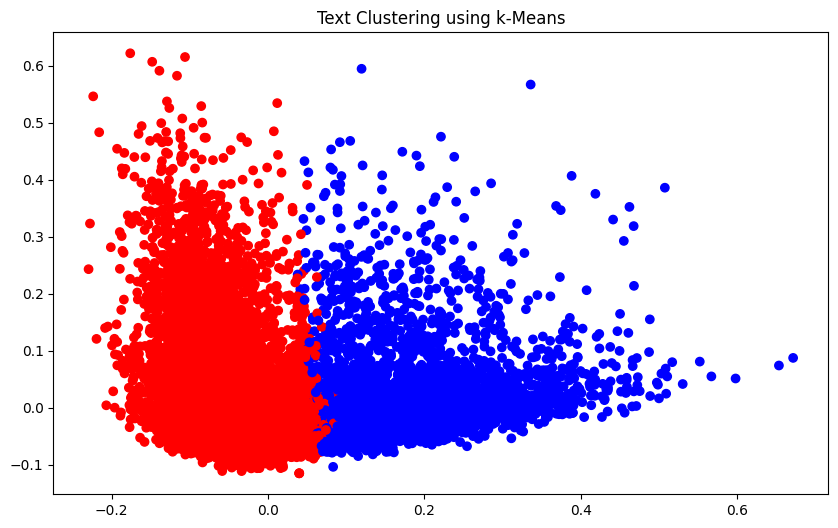

In [26]:
from sklearn.decomposition import PCA

#reduce dimensions for visualization
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(x.toarray())

#create a scatter plot
colors = ['r', 'b', 'c', 'y', 'm']
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
plt.figure(figsize=(10,6))
plt.scatter(x_axis, y_axis, c=[colors[d] for d in kmeans.labels_])
plt.title("Text Clustering using k-Means")
plt.show()

Silhoutte Score - measure of how similar an object is to its own cluster(cohesion) compared to other clusters. It ranges from -1 to +1
A value close to +1 indicates that the object is well matched to its own cluster and poorly matched to its neighbouring clusters 
A value of 0 indicated that the object is close to the boundaries
A value close to -1 indicates that the object may overlap that is it is poorly mapped. 

In [28]:
from sklearn.metrics import silhouette_score
kmeans_labels = kmeans.labels_

#evaluate the clustering
silhoutte_avg = silhouette_score(x, kmeans_labels)
print(f"K-Means Silhoutte Score: {silhoutte_avg: .2f}")

K-Means Silhoutte Score:  0.01
